# Manipulação de Dados com Pandas

### Data Reading

*Nossa base de dados pode ter origem de diferentes lugares e ter variados formatos, por conveniência trabalha-se preferencialmente com o formato CSV, mas podemos importar nossa base de dados de arquivos MySQL, SQL Server, Oracle, arquivos de banco de dados não relacionais (NoSQL) como MongoDB, Cassandra e podemos até mesmo trabalhar com páginas de Internet.*

In [ ]:
#IMPORTANDO BIBLIOTECAS
import pandas as pd
import numpy as np
from numpy import nan as NA

Lendo arquivo CSV

In [ ]:
#nota: a função header indica se há ou não um cabeçalho no Banco de Dados
#nota: a função sep indica qual o separador de cada item dos registros (aqui estamos usando a vírgula)
df = pd.read_csv('arquivo.csv', header=None, sep=',')

Exportando arquivo CSV

In [ ]:
df.to_csv('nome_do_arquivo.csv')

Lendo arquivo do Excel

In [ ]:
xlsx = pd.ExcelFile('Arquivo_Excel.xlsx')

Lendo somente uma planilha do Excel

In [ ]:
pd.read_excel(xlsx, 'Nome da Planilha')

Lendo Página da Web

In [ ]:
pd.read_html('https://www.link-da-pagina.com/index/')

### Data Cleaning

*Nem sempre nossa base de dados estará organizada, podem existir dados faltantes, duplicatas, campos preenchidos incorretamente. Nossa tarefa é identificar, corrigir e remover estes registros incorretos. O nome desse procedimento em Data Science, se chama Data Wrangling (Preparação dos Dados) ou Data Munging (Lama de Dados).*

*Veremos abaixo algumas funções e procecimentos que podem ajudar a 'limpar os dados':*

In [ ]:
#DADOS
dados = pd.Series(['melao', 'abacate', np.nan, 'tomate'])
dados2 = pd.DataFrame([[2, 7, 8], [NA, NA, NA], [2, NA, NA], [NA, 9, 5]])
dados3 = pd.Series(['melao', 'abacate', np.nan, np.nan, np.nan, 'tomate'])
dados4 = pd.DataFrame(np.random.randn(8, 4))
dados4.iloc[:4, 1] = NA
dados4.iloc[:2, 2] = NA
dados5 = pd.DataFrame({'a1': [2, 8, 2, 2, 7, 4], 'a2': [2, 1, 1, 2, 8, 4]})

Identificar os elementos que são nulos

In [ ]:
nulos = dados[dados.isnull()]
print(nulos)

2    NaN
dtype: object


Excluir quando todos os elementos da lista são nulos

In [ ]:
dados2 = dados2.dropna(how = 'all')
print(dados2)

*Se tivermos muitos dados nulos pode ser preferível excluir a coluna desta variável,*

Preencher nulos

In [ ]:
dados3 = dados3.fillna(method = 'ffill')
print(dados3)

#nota: o método ffill preenche nulos com o primeiro item da lista anterior à sequência de nulos

Preenchendo nulos por valores numéricos

In [ ]:
array = pd.Series([1, 2, np.nan, 4, 5, np.nan, np.nan, 1, 2, 2, np.nan, np.nan, 4])

#Substituindo nulos por 0
df_array_new = array.fillna(0)
print(df_array_new)

Preencher nulos com a média

In [ ]:
dados4 = dados4.fillna(dados4.mean())
print(dados4)

Removendo Duplicatas

In [ ]:
dados5 = dados5.drop_duplicates(['a1', 'a2'], keep=False)
print(dados5)

Função Map

*Usada geralmente para substituir cada valor em uma série por outro, geralmente através de uma função ou um dicionário*

In [ ]:
#neste código, para demonstração, usou-se um dicionário
data = pd.DataFrame(
    {'places': ['Brasil', 'Santa Catarina', 'Fortaleza', 'Brasilia', 'Sao Paulo', 'Portugal', 'Noruega', 'Alemanha', 'Manaus'],
     'nums':[4, 3, 1, 2, 6, 3, 1, 8, 9]})

cat_places= {
    'Brasil': 'pais',
    'Santa Catarina': 'estado',
    'Fortaleza': 'cidade',
    'Brasilia': 'cidade',
    'Sao Paulo': 'estado',
    'Portugal': 'pais',
    'Noruega': 'pais',
    'Alemanha': 'pais',
    'Manaus': 'cidade'   
}

data['categoria'] = data['places'].map(cat_places)

print(data)

Preenchendo valores baseando-se em sua probabilidade de ocorrência

In [ ]:
vetor = pd.Series([ np.nan, 'Bruno', 'Marco', 'Carla', 'Bruno', 'Bruno', 'Marco'])
contagem = vetor.value_counts(1)

escolher = np.random.choice(contagem.index.values, p=contagem.values)
vetor = vetor.fillna(escolher)
print(vetor)

0    Bruno
1    Bruno
2    Marco
3    Carla
4    Bruno
5    Bruno
6    Marco
dtype: object


### Preparação dos Dados

Removendo Outliers

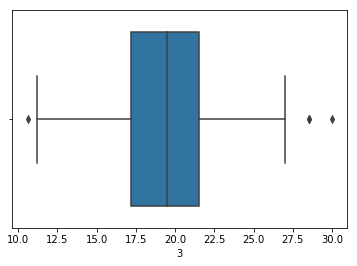

23.65
[0 1 2]


In [ ]:
from sklearn.datasets import load_wine
import seaborn as sns
import matplotlib.pyplot as plt

#Visualizando Outliers
var_independente = pd.DataFrame(load_wine().data)
sns.boxplot(var_independente[3])
plt.show()

quartil1 = var_independente[3].quantile(.25)
quartil2 = var_independente[3].quantile(.75)

print(quartil1 + (quartil2-quartil1)*1.5)

print(var_dependente.unique())

Normalização

### Alterando aspectos da Apresentação dos Dados

Merge

In [ ]:
#DADOS
frame = pd.DataFrame(np.arange(16).reshape((4, 4)),
                     index = [['a', 'a', 'b', 'c'], [1, 2, 1, 2]],
                     columns = [['Rio de Janeiro', 'Sao Paulo', 'Fortaleza', 'Sao Paulo'],['Azul', 'Azul', 'Verde', 'Amarelo']])

dados1 = pd.DataFrame({'a1': ['d', 'k', 'p', 'b', 'l', 'o', 'k'],  'ordem': [1,2,3,4,5,6,7]})
dados2 = pd.DataFrame({'a1': ['k', 'p', 'l'],  'idade': [40,50,60]})

juntar = pd.merge(dados1, dados2, on='a1', how='left')
print(juntar)

  a1  ordem  idade
0  d      1    NaN
1  k      2   40.0
2  p      3   50.0
3  b      4    NaN
4  l      5   60.0
5  o      6    NaN
6  k      7   40.0


Fundição

In [ ]:
df = pd.DataFrame({
    'nomes': ['Bruno', 'Carla', 'Fabio'],
    'idade': [26, 20, 30],
    'peso': [68, 55, 70],
    'nums': [7, 8, 9]})

fundir = pd.melt(df, ['nomes'])
print(fundir)

   nomes variable  value
0  Bruno    idade     26
1  Carla    idade     20
2  Fabio    idade     30
3  Bruno     peso     68
4  Carla     peso     55
5  Fabio     peso     70
6  Bruno     nums      7
7  Carla     nums      8
8  Fabio     nums      9


Tabela Pivot

In [ ]:
pivot = fundir.pivot('nomes', 'variable', 'value')
print(pivot)

variable  idade  nums  peso
nomes                      
Bruno        26     7    68
Carla        20     8    55
Fabio        30     9    70


Stack

In [ ]:
#nota: a função Stack 'empilha' as colunas para cada elemento do index
stack = pivot.stack()
print(stack)

nomes  variable
Bruno  idade       26
       nums         7
       peso        68
Carla  idade       20
       nums         8
       peso        55
Fabio  idade       30
       nums         9
       peso        70
dtype: int64


Unstack - *devolve a sua forma original*

In [ ]:
unstack = stack.unstack()
print(unstack)

variable  idade  nums  peso
nomes                      
Bruno        26     7    68
Carla        20     8    55
Fabio        30     9    70


Agrupar

In [ ]:
#DADOS
df = pd.DataFrame({
    'key1': ['baz', 'baz', 'foz', 'foz', 'baz'],
    'key2': ['Bruno', 'Marco', 'Marco', 'Bruno', 'Bruno'],
    'data1': np.random.rand(5),
    'data2': np.random.rand(5)})

group = df['data1'].groupby(df['key1'])
print('agrupamento = \n', list(group))

Agrupar com mais de um index

In [ ]:
means = df['data1'].groupby([df['key2'], df['key1']])
print('média \n', list(means))

#nota: também podemos utilizar outras medidas como somatório, contagem ou mediana

Agrupar utilizando a média como parâmetro

In [ ]:
means = df['data1'].groupby([df['key2'], df['key1']]).mean()
print('média \n', means)

Fragmentar

In [ ]:
print('fragmentar \n', means.unstack())

Agrupar usando dicionário

In [ ]:
people = pd.DataFrame(np.random.randn(5, 5),
                      columns = ['a', 'b', 'c', 'd', 'e'],
                      index = ['Carla', 'Julio', 'Marco', 'Jim', 'Fabio'])

mapping = {'a': 'azul', 'b': 'azul', 'c': 'verde', 'd': 'verde', 'e': 'azul', 'e' : 'amarelo'}
by_column = people.groupby(mapping, axis=1)

print(by_column.sum())

Agrupar usando múltiplos indexes

In [ ]:
columns = pd.MultiIndex.from_arrays([['SP', 'SP', 'SP', 'RJ', 'RJ'],
                                     [2, 1, 3, 2, 3]],
                                    names = ['cidade', 'categoria'])

group_df = pd.DataFrame(np.random.randn(4, 5), columns=columns)
print(group_df)

Selecionando uma única coluna para agrupar

In [ ]:
print(group_df.groupby(level='cidade', axis=1).sum())